### Import Libraries

In [103]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [104]:
sns.set_style('darkgrid')

### Load Dataset

In [105]:
# Load csv
df = pd.read_csv("data/loan.csv")

/tmp/ipykernel_25855/1250389818.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan.csv")


In [106]:
# Shape of dataframe
df.shape

(39717, 111)

In [107]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data understanding

We observed that the dataset contain few columns which are only filled with None, so we decided to remove them.

In [108]:
# List of all columns where values are filled with only None
df.columns[df.isnull().sum()==df.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [109]:
# Removing where all are filled with None
df.dropna(inplace=True, axis=1, how="all")

We also observed columns where there are only one value present, so we decided to remove those columns.

In [110]:
# List of all columns where all rows contain same value
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [111]:
# Removing where nunique is 1
df = df[[i for i in df if df[i].nunique()>1]]

In [112]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


##### We analysed the remaining 48 columns, we find out that there are columns which help us in determining risk analysis for loan, and some columns are customer behaviour columns, which will be available once a person takes a loan.

- "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc" are not required for risk analysis
- "out_prncp_inv" , "total_pymnt_inv" are useful for investor only
- "funded_amnt", "funded_amnt_inv" and "loan_amnt" are pretty much similar so we decide to keep only "loan_amnt"
- columns which are not present before loan was taken, 
    - delinq_2yrs
    - revol_bal
    - out_prncp
    - total_pymnt
    - total_rec_prncp
    - total_rec_int
    - total_rec_late_fee
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - next_pymnt_d
    - chargeoff_within_12_mths
    - mths_since_last_delinq
    - mths_since_last_record
    - pub_rec_bankruptcies
    - total_acc
    - revol_util
    - pub_rec
    - open_acc
    - inq_last_6mths
    - earliest_cr_line
    - installment

In [113]:
# Removing columns which are not required for risk analysis of loan
columns_to_drop = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "funded_amnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "pub_rec_bankruptcies", "total_acc", "revol_util", "pub_rec", "open_acc", "inq_last_6mths", "earliest_cr_line", "installment"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [114]:
# Remaining Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   grade                39717 non-null  object 
 4   sub_grade            39717 non-null  object 
 5   emp_length           38642 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  dti                  39717 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


We only need "Fully Paid" and "Charged Off", so we can remove "Current" loan status from dataset

In [115]:
# Remove Current loan status from dataset
df = df[df.loan_status != "Current"]

In [116]:
# Updated dataset shape
df.shape

(38577, 13)

### Data Cleaning

In [117]:
# List number of missing values in each columns
df.isna().sum()* 100 / len(df)

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
dtype: float64

emp_length contains 2.7% which can be removed

In [118]:
df.dropna(subset=["emp_length"], inplace=True, axis=0)

There are 3 rows which have home_ownership as NONE, we can remove those value

In [119]:
df = df[df.home_ownership != "NONE"]

##### Standardising Values

Making sub_grade numerical e.g, a1 -> 1

In [120]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))

int_rate is an object but it should be numerical value, so we are converting it from "14%" to 14.0

In [121]:
df["int_rate"] = df.int_rate.apply(lambda x: float(x.replace("%", "")))

emp_length should be a numerical value, so we are updating "< 1 year" as 0 and "10+ years" as 10

In [122]:
def remove_years(s):
    """ Function to remove years and year"""
    return s.replace("years", "").replace("year", "")

In [123]:
df["emp_length"] = df.emp_length.apply(lambda x: 0 if "<" in remove_years(x) else 10 if "+" in remove_years(x) else int(remove_years(x)))

Split issue_d to issue_month and issue_year

In [124]:
df["issue_d"] = df["issue_d"].apply(lambda x: datetime.strptime(x, '%b-%y'))
df["issue_month"] = df["issue_d"].apply(lambda x: x.month)
df["issue_year"] = df["issue_d"].apply(lambda x: x.year)
df.drop(["issue_d"], axis=1, inplace=True)

##### Outlier Removal

Boxplot for annual_inc

<AxesSubplot:xlabel='annual_inc'>

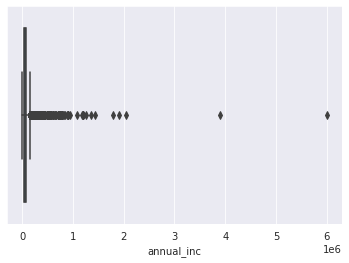

In [125]:
sns.boxplot(data=df, x='annual_inc')

In [126]:
df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.0
0.75     83000.0
0.90    116664.0
0.95    142000.0
0.97    166240.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64

We can see 95%ile, looks like outlier

In [127]:
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

Boxplot for dti

<AxesSubplot:xlabel='dti'>

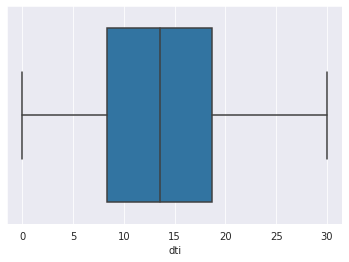

In [128]:
sns.boxplot(data=df, x="dti")

Boxplot for loan_amnt

<AxesSubplot:xlabel='loan_amnt'>

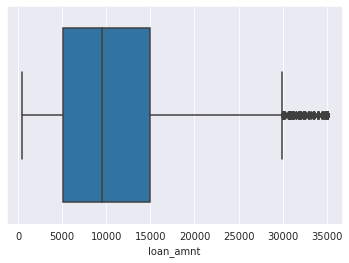

In [129]:
sns.boxplot(data=df, x="loan_amnt")

In [130]:
df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25817.5
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

This looks pretty continuous, so no need to remove outlier

### Univariate Analysis

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35672 non-null  int64  
 1   term                 35672 non-null  object 
 2   int_rate             35672 non-null  float64
 3   grade                35672 non-null  object 
 4   sub_grade            35672 non-null  int64  
 5   emp_length           35672 non-null  int64  
 6   home_ownership       35672 non-null  object 
 7   annual_inc           35672 non-null  float64
 8   verification_status  35672 non-null  object 
 9   loan_status          35672 non-null  object 
 10  purpose              35672 non-null  object 
 11  dti                  35672 non-null  float64
 12  issue_month          35672 non-null  int64  
 13  issue_year           35672 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 4.1+ MB


In [132]:
categorical_columns = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "issue_month", "issue_year"]
continuous_columns = ["loan_amnt", "int_rate", "annual_inc", "dti"]

Analyzing Categorical Column

Loan Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

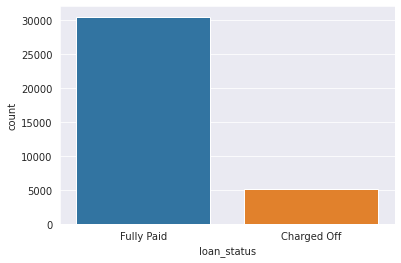

In [133]:
sns.countplot(data=df, x='loan_status')

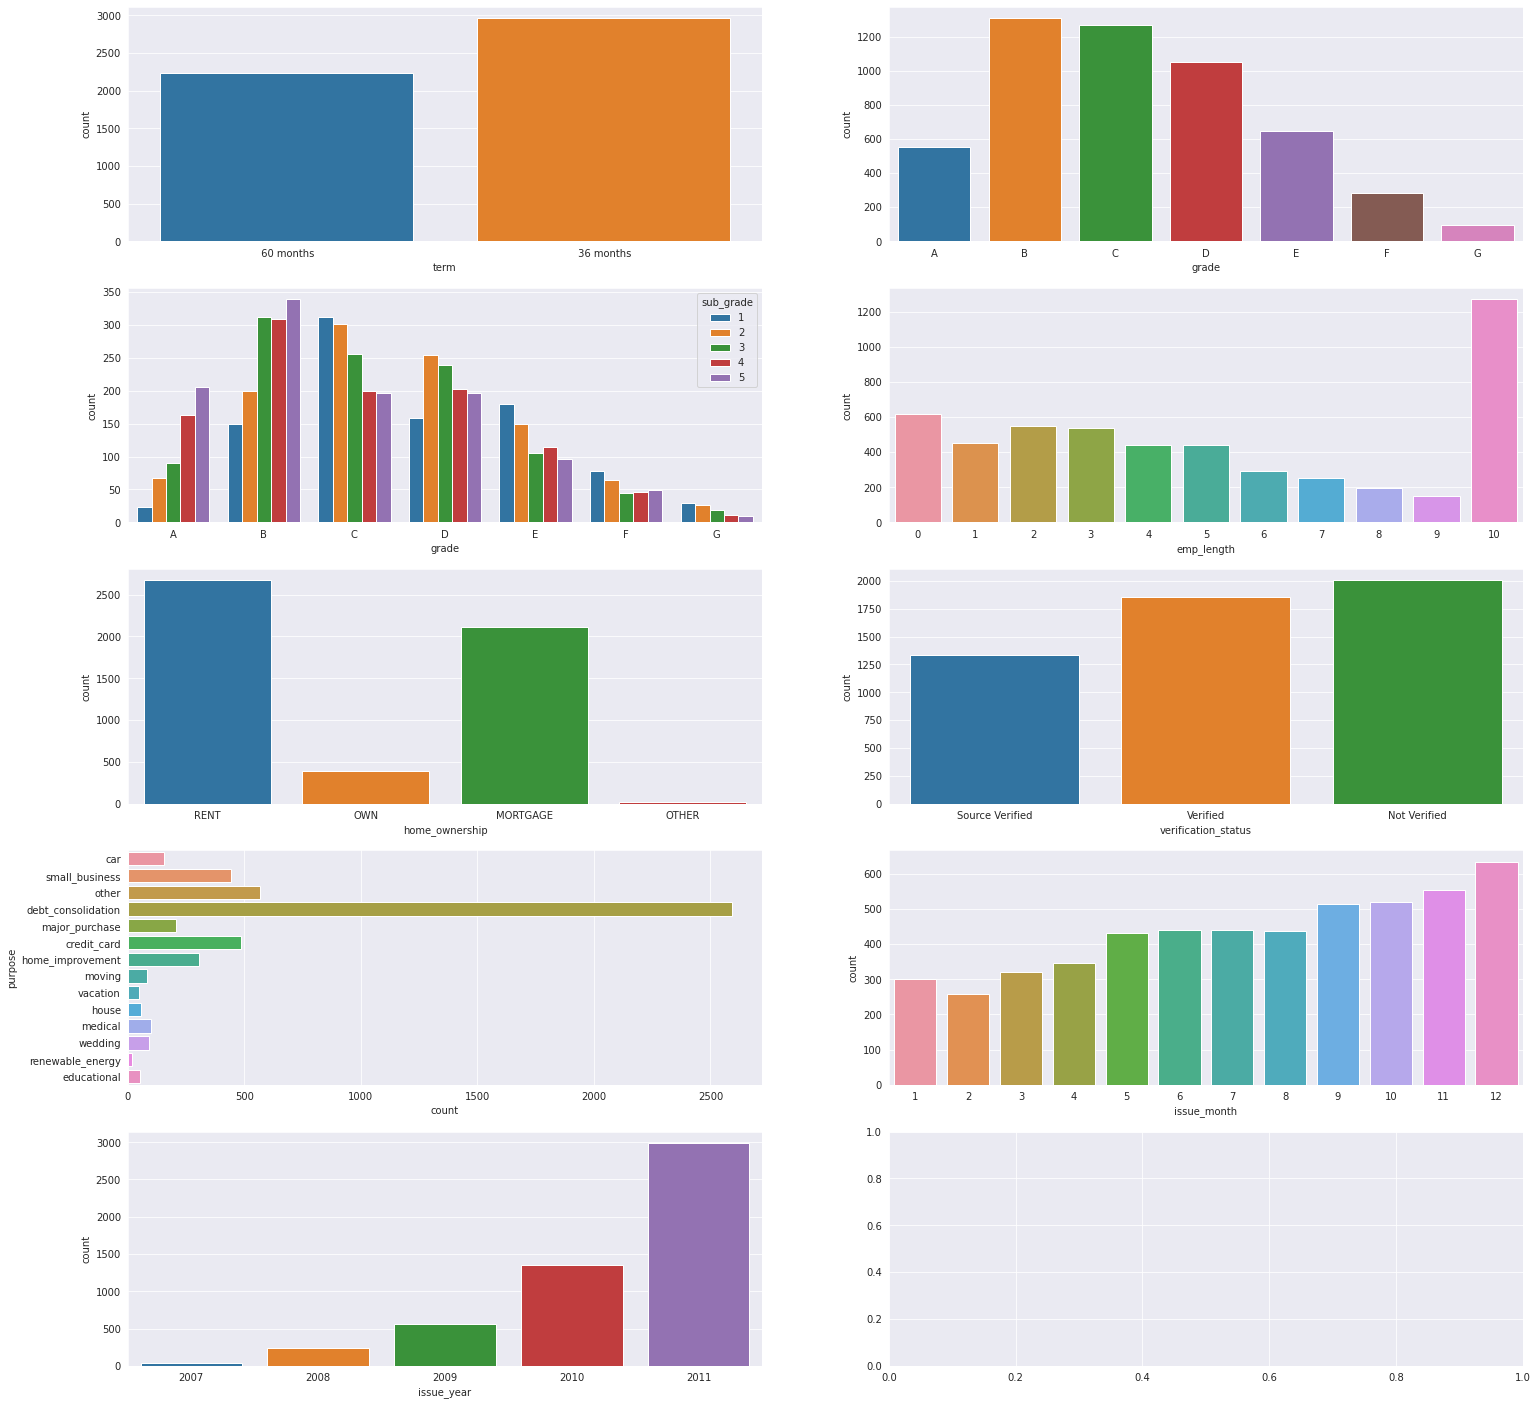

In [134]:
fig, ax =plt.subplots(5,2, figsize=(25,25))
# Multiple Graph
sns.countplot(data=df[df.loan_status=='Charged Off'], x='term', ax=ax[0][0])
sns.countplot(data=df[df.loan_status=='Charged Off'], x="grade", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], ax=ax[0][1])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='sub_grade', ax=ax[1][0])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='emp_length', ax=ax[1][1])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='home_ownership', ax=ax[2][0])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='verification_status', ax=ax[2][1])
sns.countplot(data=df[df.loan_status=='Charged Off'], y='purpose', ax=ax[3][0])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='issue_month', ax=ax[3][1])
sns.countplot(data=df[df.loan_status=='Charged Off'], x='issue_year', ax=ax[4][0])
plt.show()

##### Observations:
People have higher probability to Charged off when:
- Home Ownership is Rent.
- Grade is B grade with sub_grade 5.
- Employment length is 10
- Verification Status is not verified
- Purpose is debt consolidation
- Issue month is December
- Issue year is 2011(Due to Black Monday in 2011)

Analyzing Continuous Column

In [135]:
def generate_bucket_split(column):
    split = np.array_split(range(int(column.min()), int(column.max())+1), 5)
    bucket_label = []
    for i in split:
        bucket_label.append("{}-{}".format(i[0], i[-1]))
    return bucket_label

In [136]:
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=5, precision=0, labels=generate_bucket_split(df.loan_amnt))
df['int_rate_bucket'] = pd.cut(df['int_rate'], bins=5, precision=0, labels=generate_bucket_split(df.int_rate))
df['annual_inc_bucket'] = pd.cut(df['annual_inc'], bins=5, precision=0, labels=generate_bucket_split(df.annual_inc))
df['dti_bucket'] = pd.cut(df['dti'], bins=5, precision=0, labels=generate_bucket_split(df.dti))


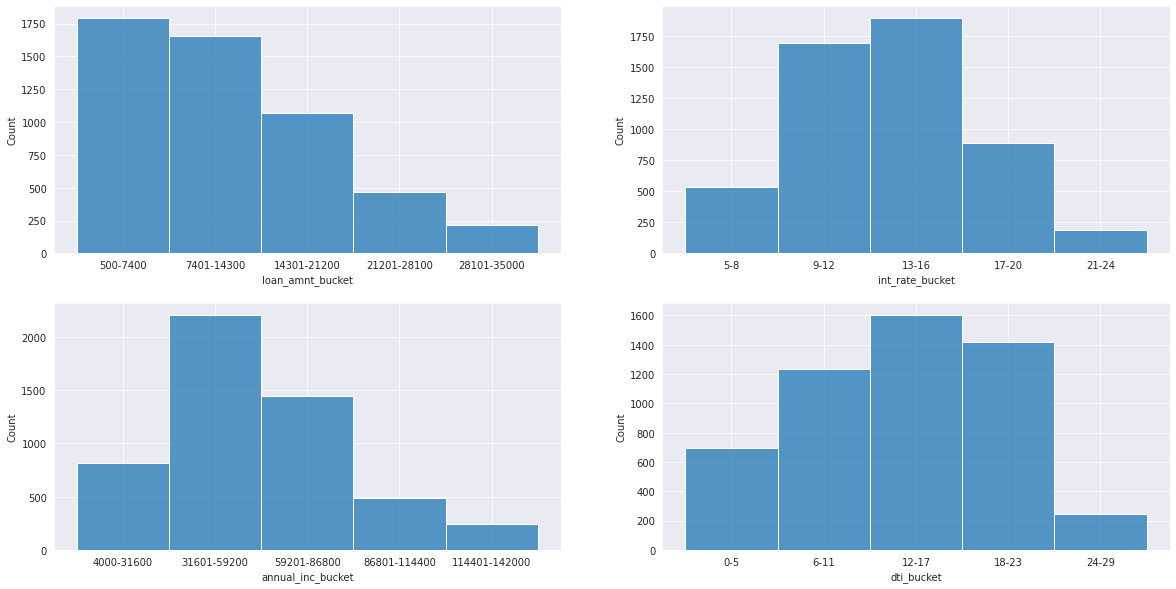

In [137]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

# Multiple Graph
sns.histplot(data=df[df.loan_status=='Charged Off'], x='loan_amnt_bucket', ax=ax[0][0])
sns.histplot(data=df[df.loan_status=='Charged Off'], x='int_rate_bucket', ax=ax[0][1])
sns.histplot(data=df[df.loan_status=='Charged Off'], x="annual_inc_bucket", ax=ax[1][0])
sns.histplot(data=df[df.loan_status=='Charged Off'], x="dti_bucket", ax=ax[1][1])
plt.show()

##### Observations:
People have higher probability to Charged off when:
- Loan Amount is between 500-7400.
- Interest Rate is between 13-16%.
- Annual Income is between 31600-59200.
- DTI is between 12-17

### Segmented Univariate Analysis

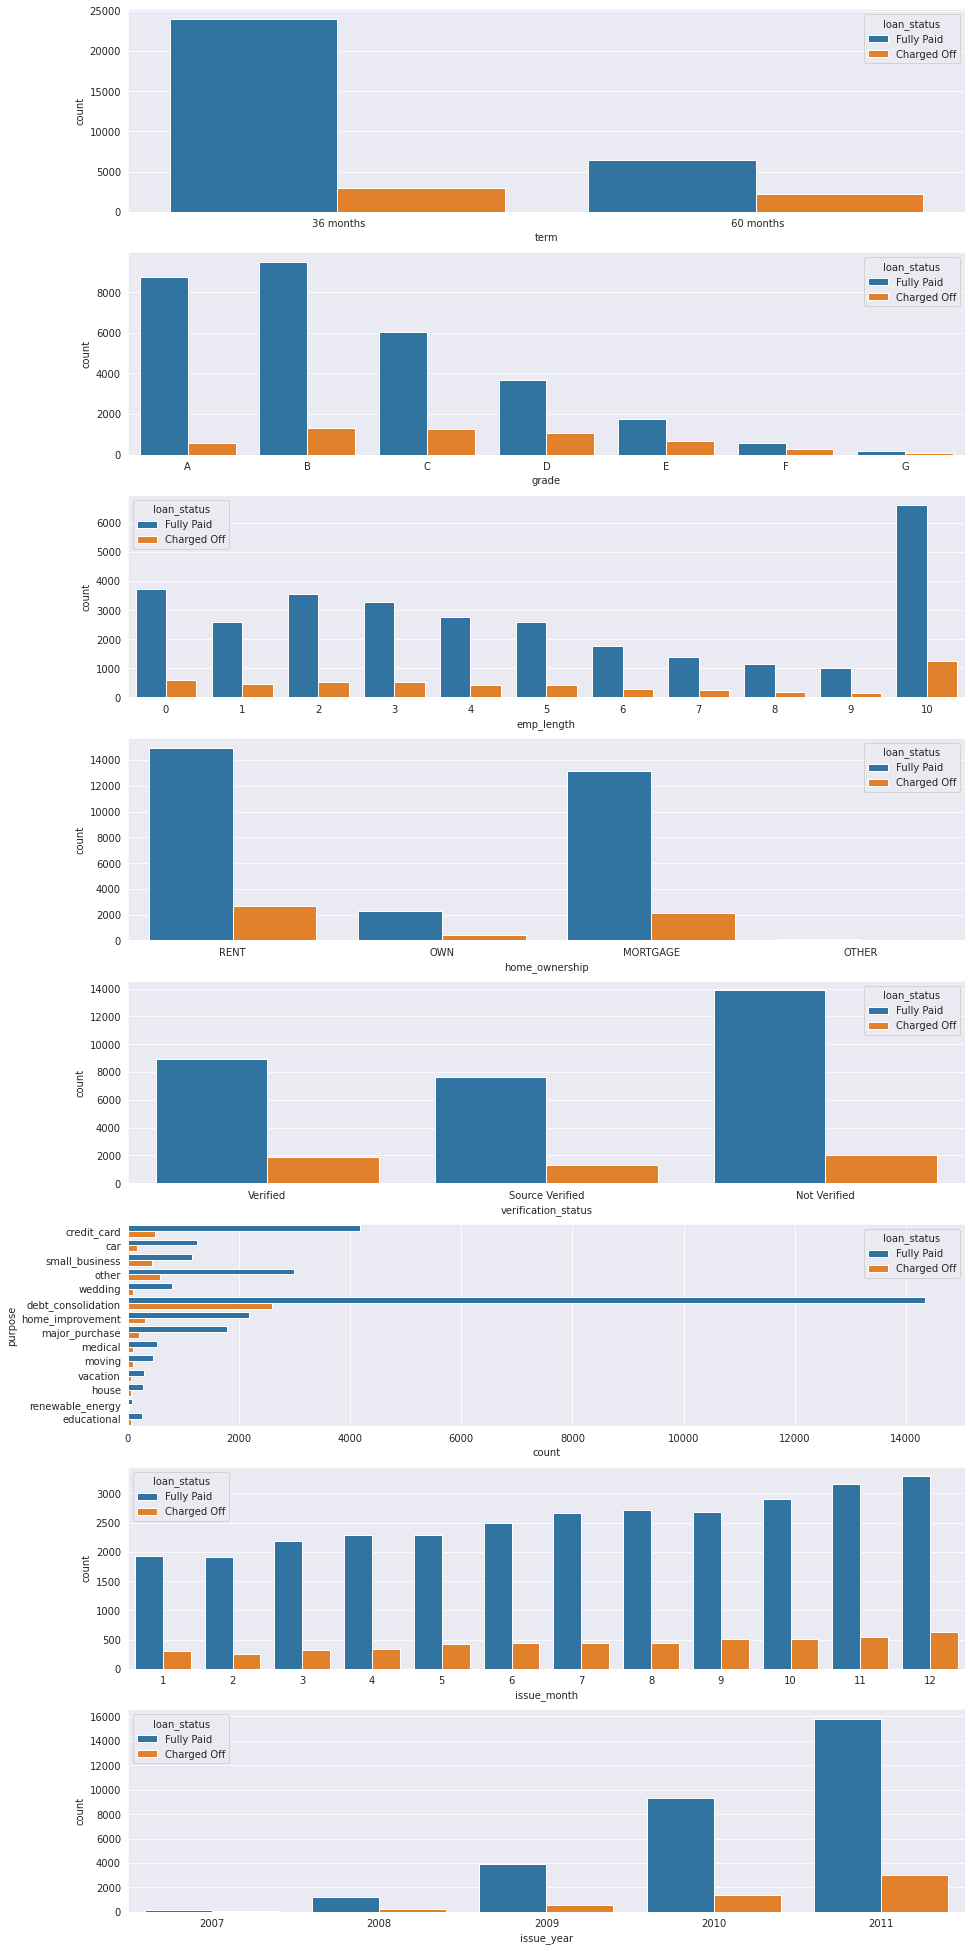

In [138]:
fig, ax =plt.subplots(8,1, figsize=(15,35))

# Multiple Graph
sns.countplot(data=df, x='term', hue="loan_status", ax=ax[0])
sns.countplot(data=df, x="grade", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue="loan_status", ax=ax[1])
sns.countplot(data=df, x='emp_length', hue="loan_status", ax=ax[2])
sns.countplot(data=df, x='home_ownership', hue="loan_status", ax=ax[3])
sns.countplot(data=df, x='verification_status', hue="loan_status", ax=ax[4])
sns.countplot(data=df, y='purpose', hue="loan_status", ax=ax[5])
sns.countplot(data=df, x='issue_month', hue="loan_status", ax=ax[6])
sns.countplot(data=df, x='issue_year', hue="loan_status", ax=ax[7])
plt.show()

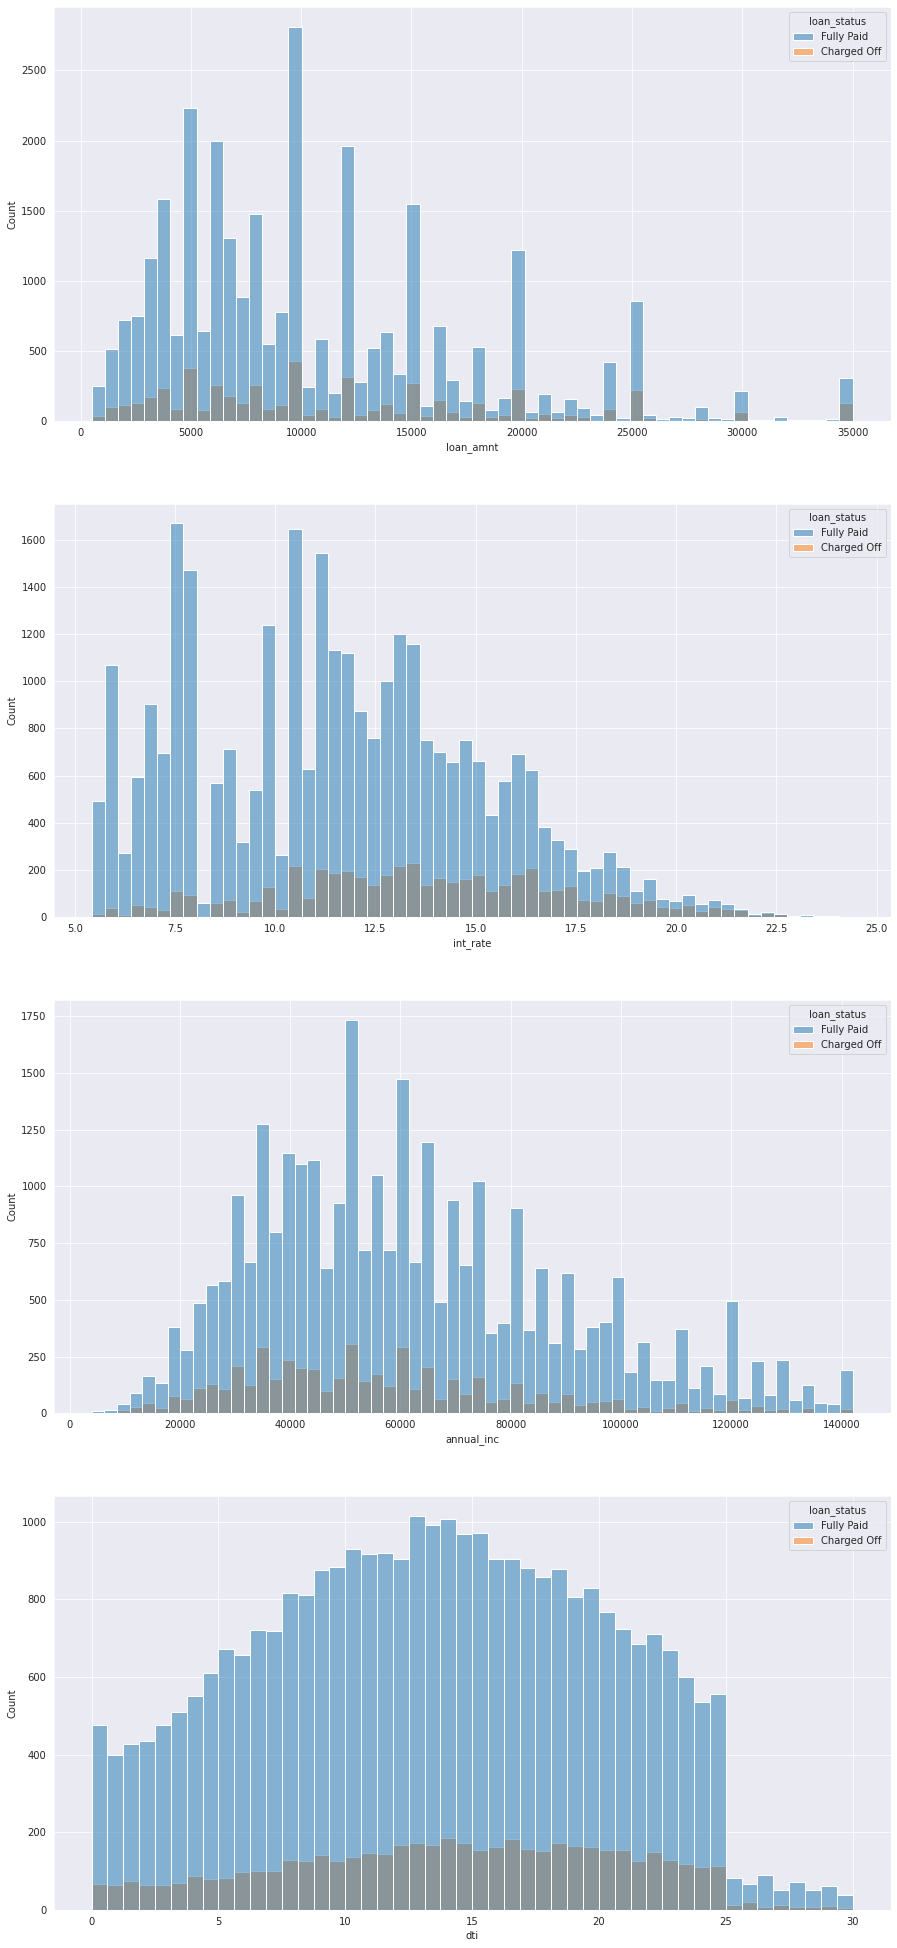

In [139]:
fig, ax =plt.subplots(4,1, figsize=(15,35))

# Multiple Graph
sns.histplot(data=df, x='loan_amnt', hue="loan_status", ax=ax[0])
sns.histplot(data=df, x='int_rate', hue="loan_status", ax=ax[1])
sns.histplot(data=df, x="annual_inc", hue="loan_status", ax=ax[2])
sns.histplot(data=df, x="dti", hue="loan_status", ax=ax[3])
plt.show()

### Bivariate Analysis

Analysing annual income with other columns

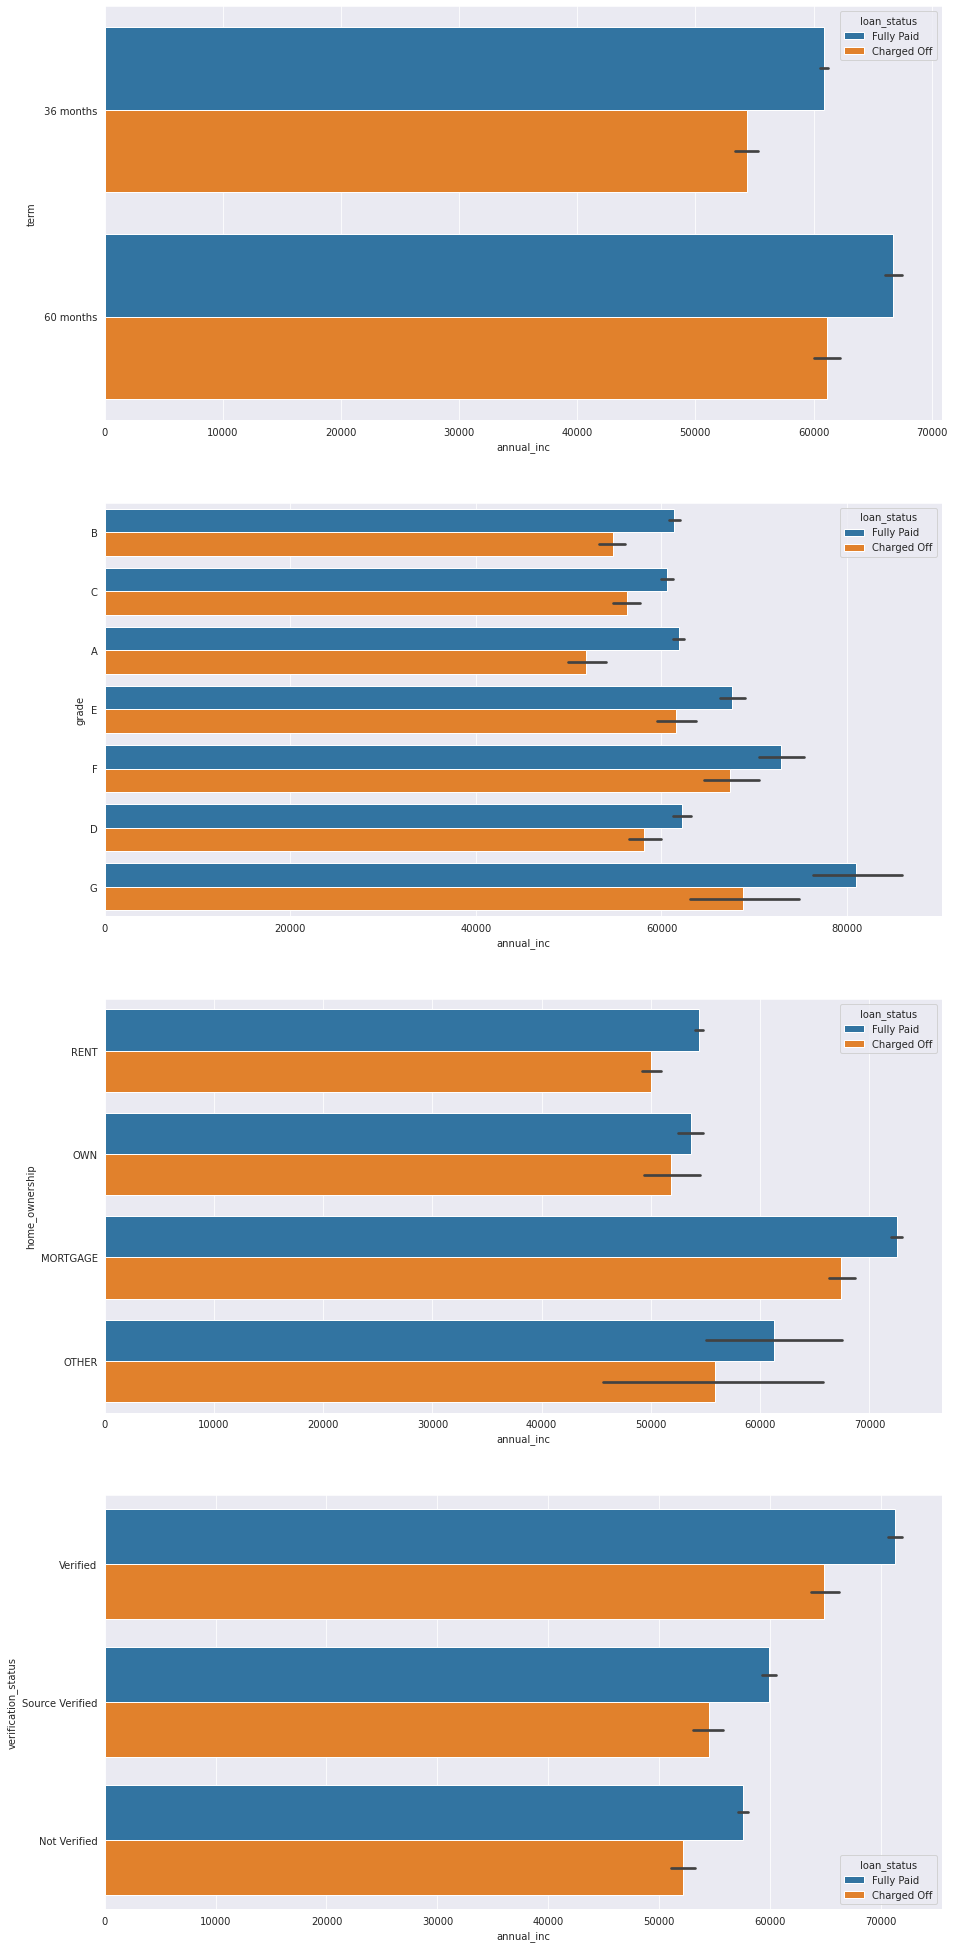

In [140]:
fig, ax = plt.subplots(4,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='annual_inc', y='term', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='annual_inc', y='grade', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='annual_inc', y='home_ownership', hue="loan_status", ax=ax[2])
sns.barplot(data=df, x='annual_inc', y='verification_status', hue="loan_status", ax=ax[3])
plt.show()

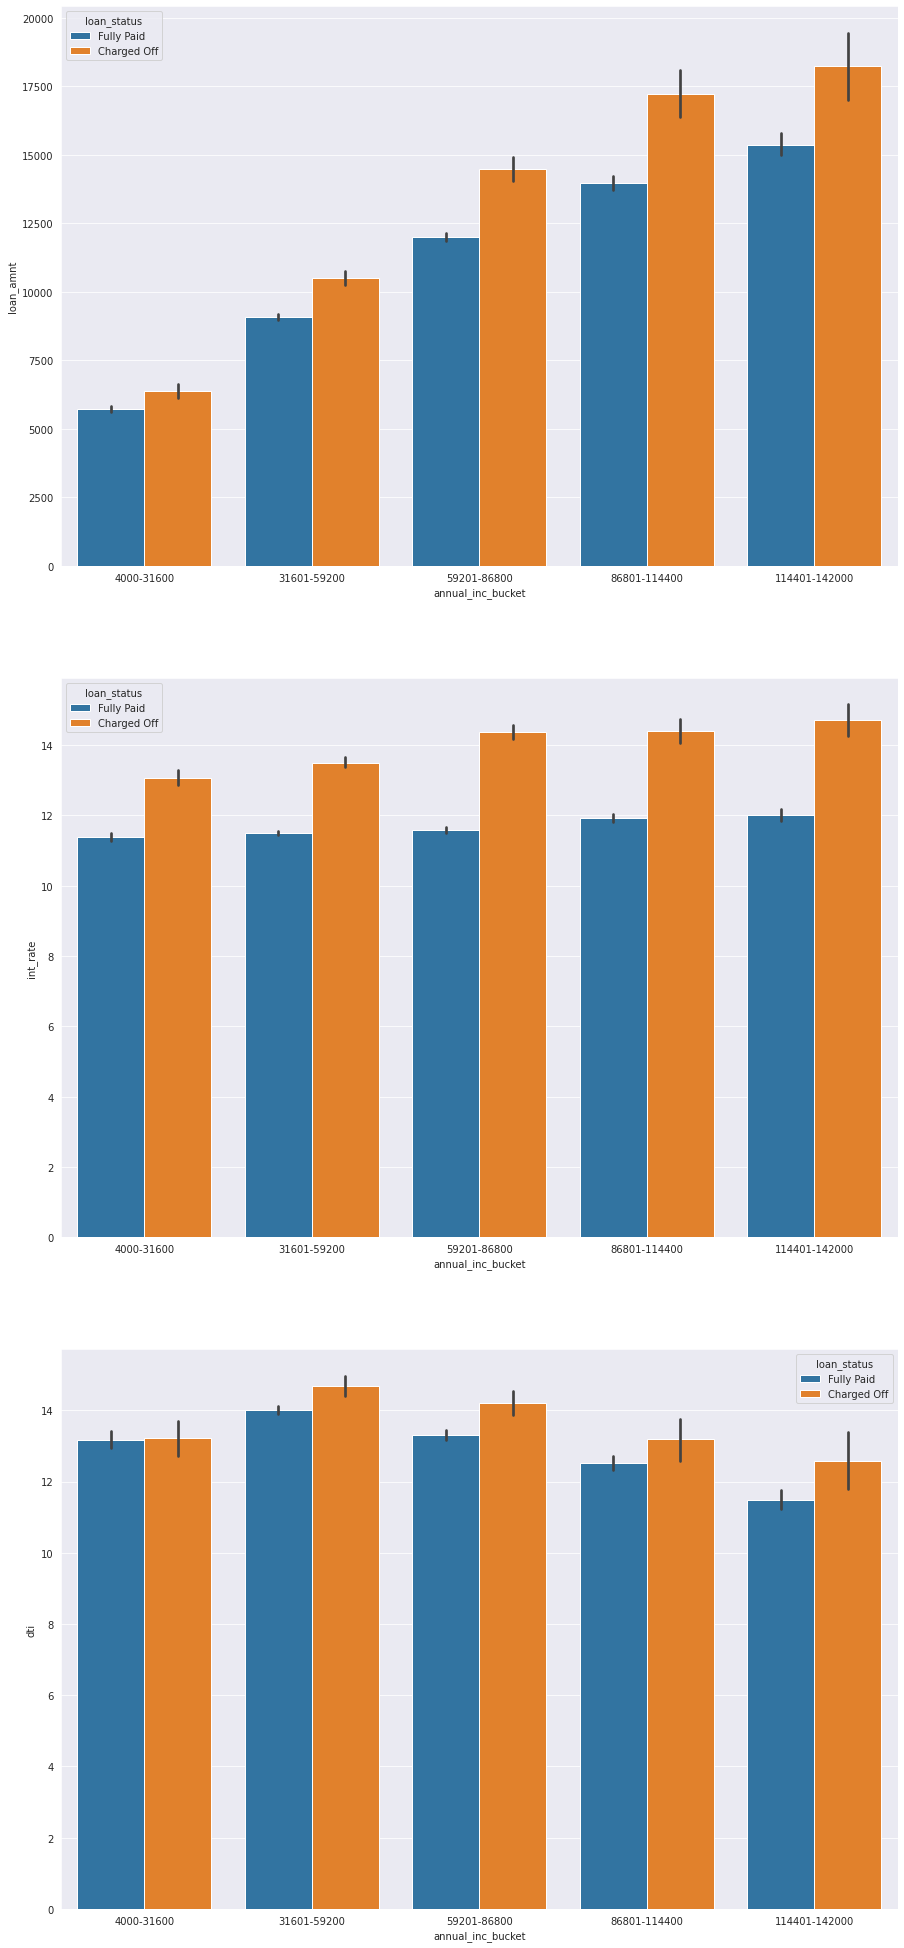

In [141]:
fig, ax = plt.subplots(3,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='annual_inc_bucket', y='loan_amnt', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='annual_inc_bucket', y='int_rate', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='annual_inc_bucket', y='dti', hue="loan_status", ax=ax[2])
plt.show()

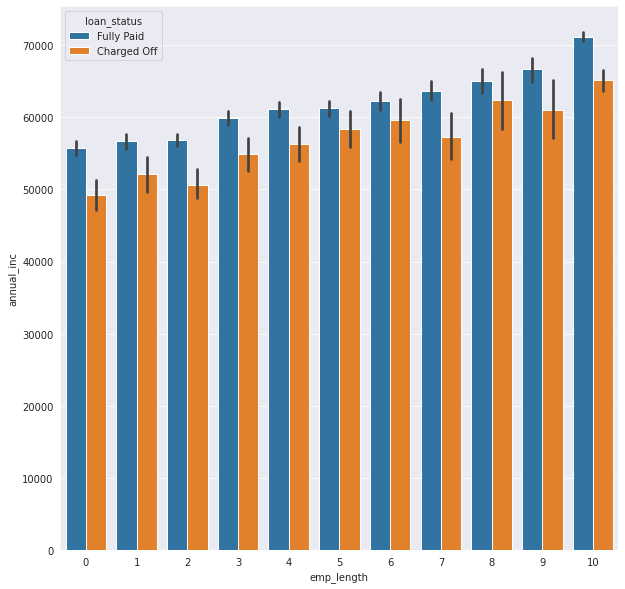

In [146]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='emp_length', y='annual_inc', hue="loan_status")
plt.show()

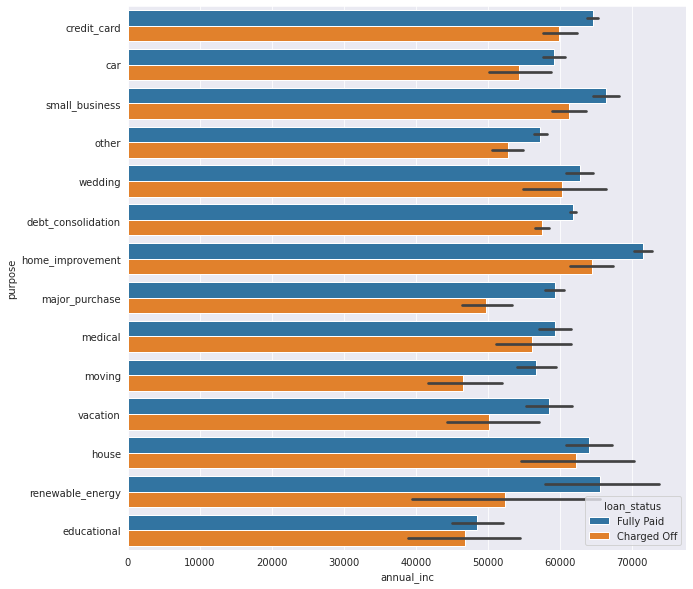

In [149]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='purpose', x='annual_inc', hue="loan_status")
plt.show()

Analysing Interest rate with other columns

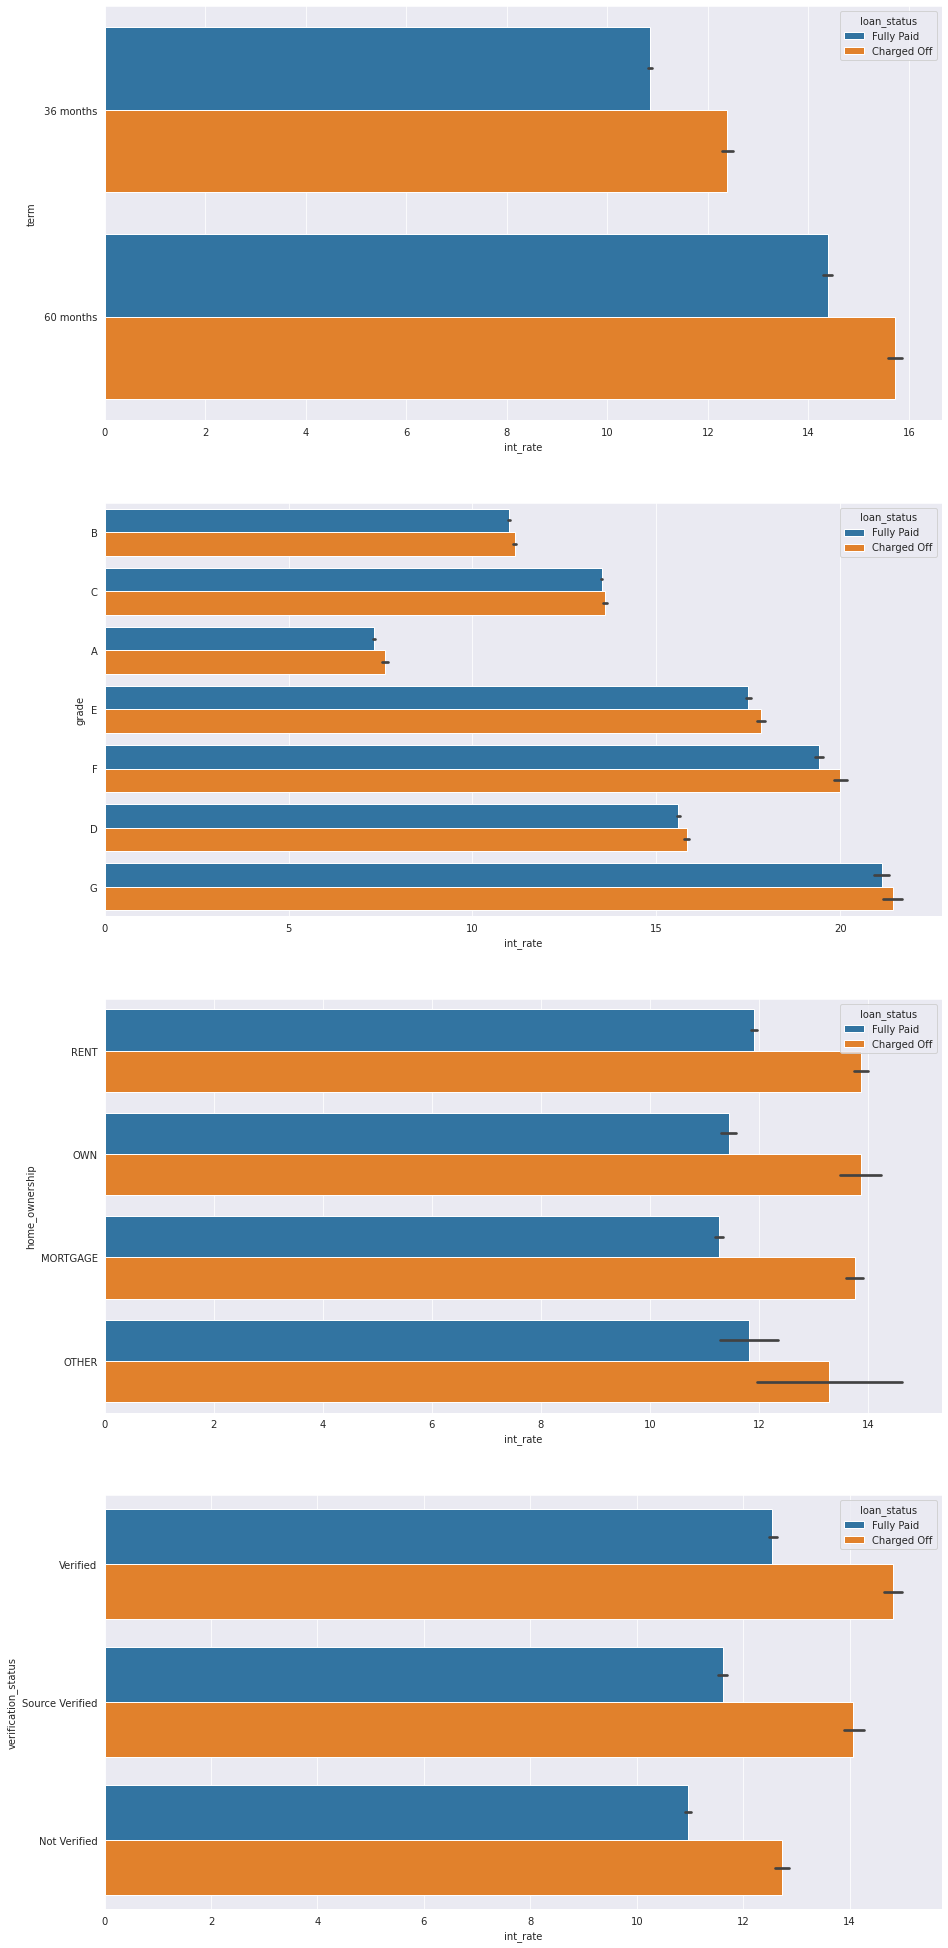

In [150]:
fig, ax = plt.subplots(4,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='int_rate', y='term', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='int_rate', y='grade', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='int_rate', y='home_ownership', hue="loan_status", ax=ax[2])
sns.barplot(data=df, x='int_rate', y='verification_status', hue="loan_status", ax=ax[3])
plt.show()

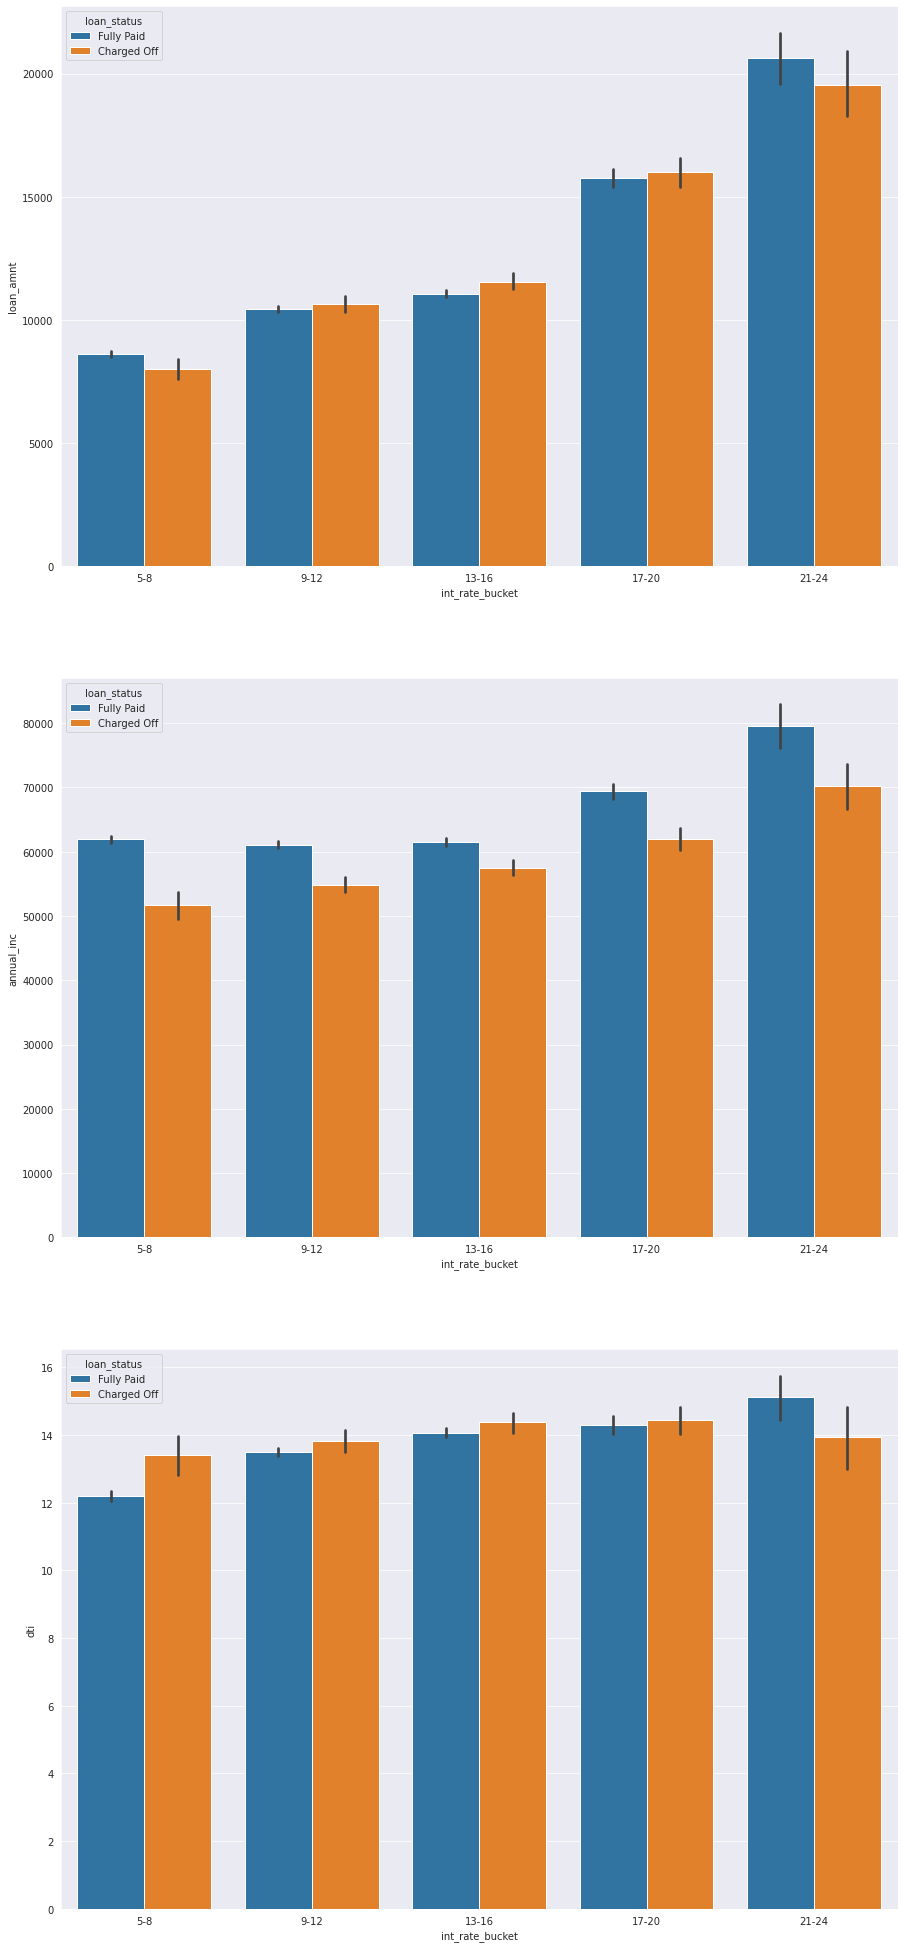

In [151]:
fig, ax = plt.subplots(3,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='int_rate_bucket', y='loan_amnt', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='int_rate_bucket', y='annual_inc', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='int_rate_bucket', y='dti', hue="loan_status", ax=ax[2])
plt.show()

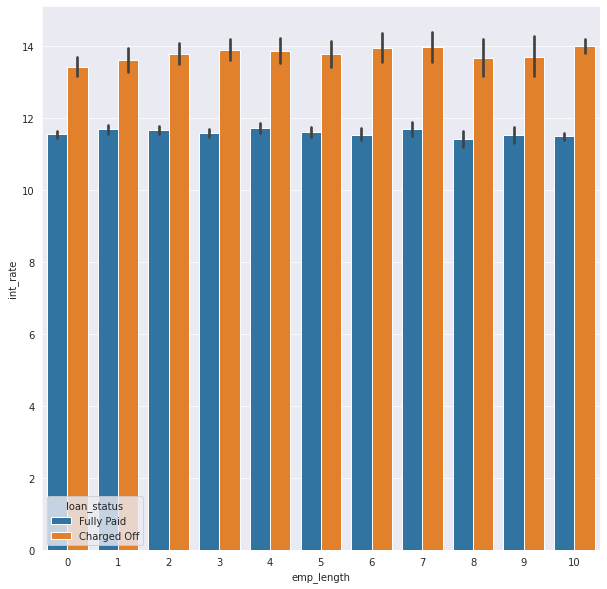

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='emp_length', y='int_rate', hue="loan_status")
plt.show()

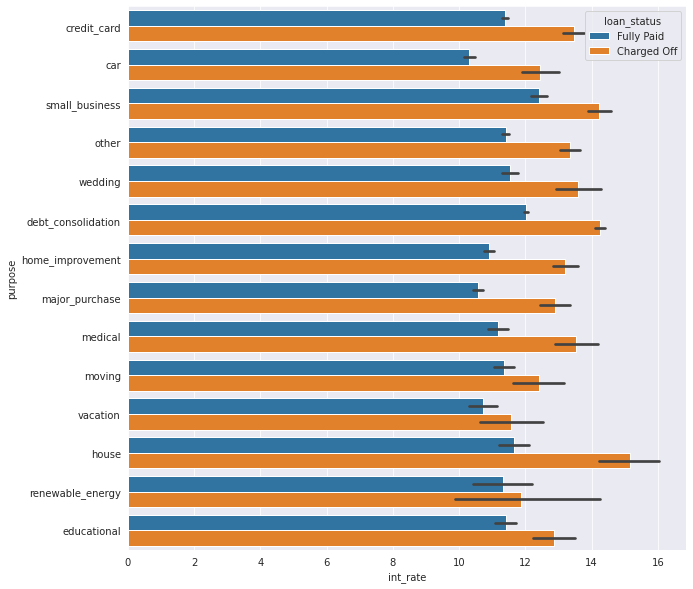

In [154]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='purpose', x='int_rate', hue="loan_status")
plt.show()

Analysing loan amount with other columns

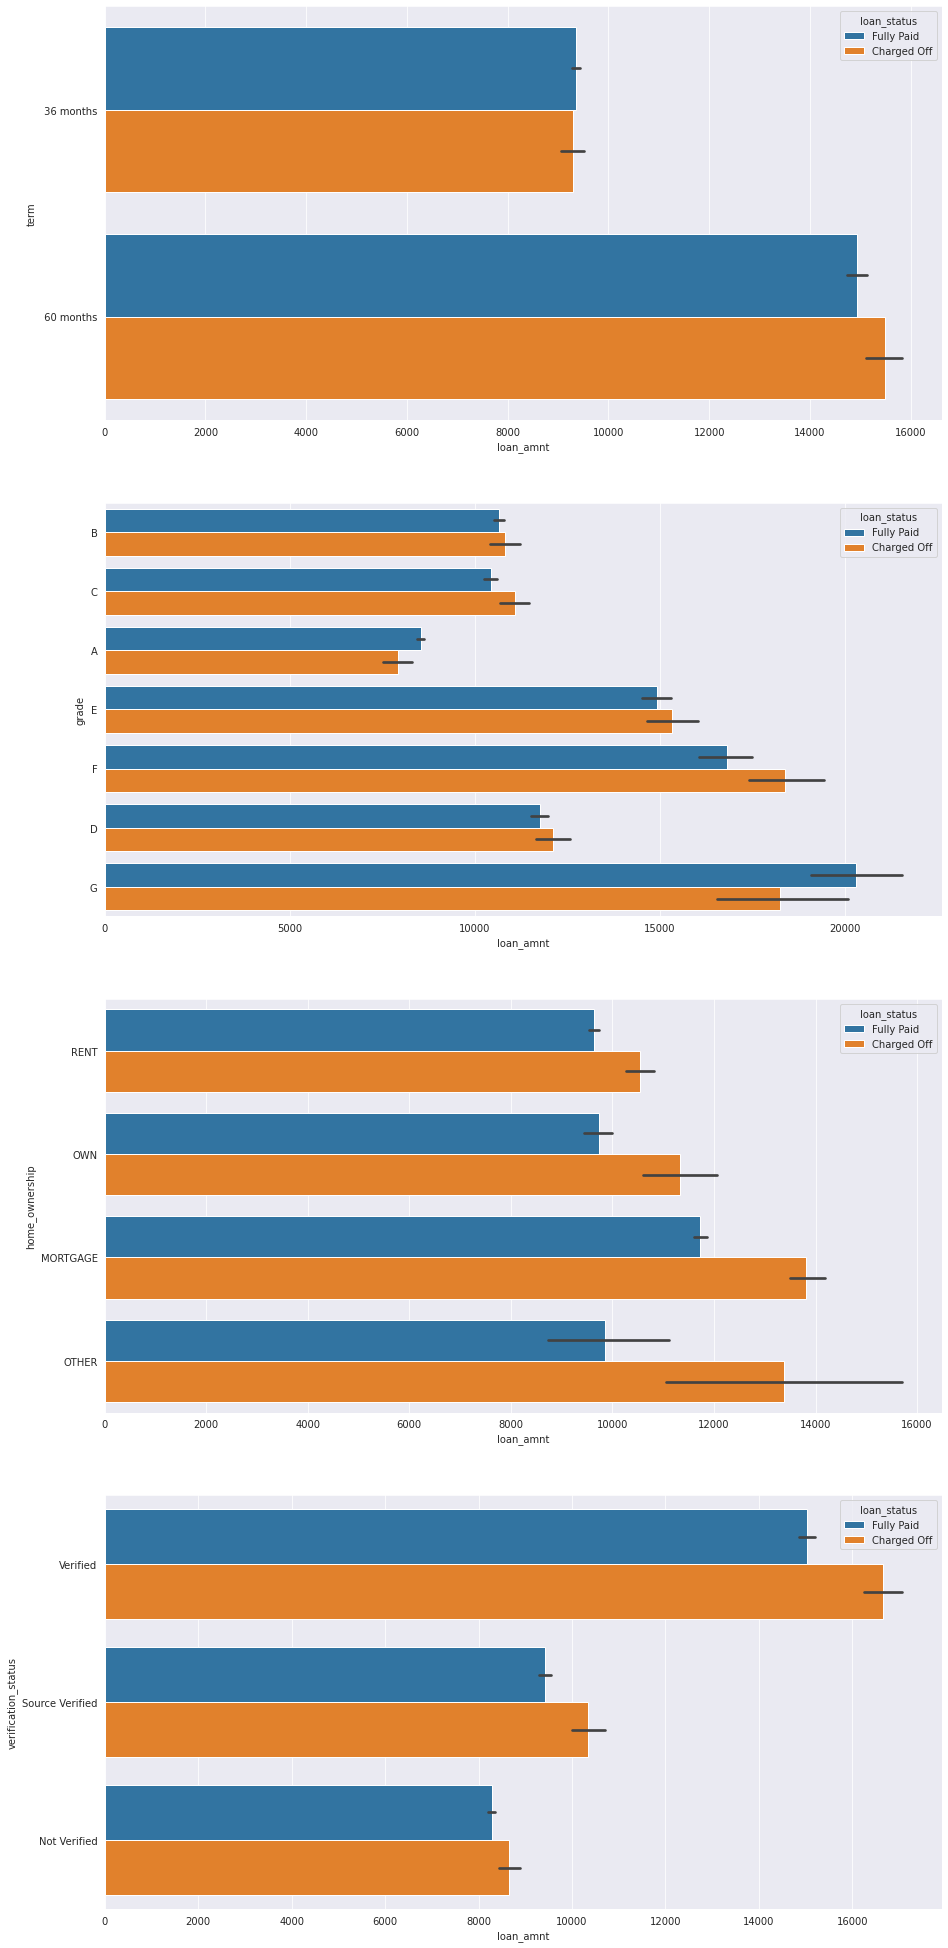

In [155]:
fig, ax = plt.subplots(4,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='loan_amnt', y='term', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='loan_amnt', y='grade', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='loan_amnt', y='home_ownership', hue="loan_status", ax=ax[2])
sns.barplot(data=df, x='loan_amnt', y='verification_status', hue="loan_status", ax=ax[3])
plt.show()

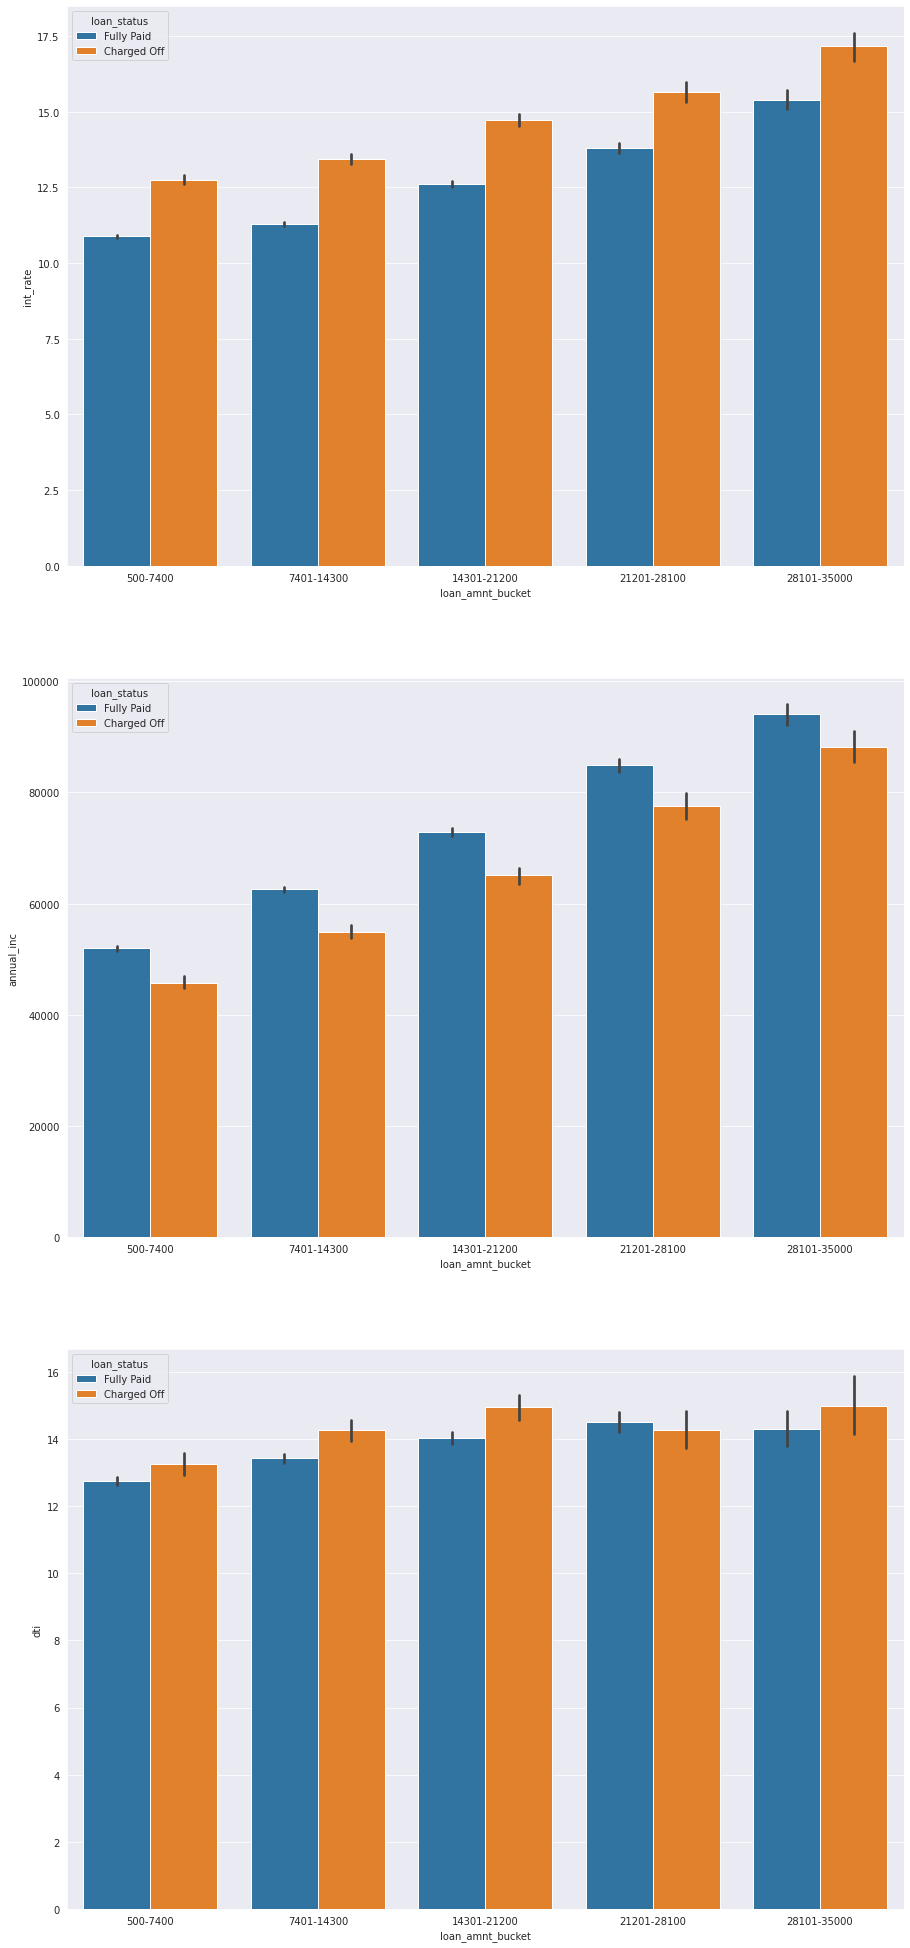

In [156]:
fig, ax = plt.subplots(3,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='loan_amnt_bucket', y='int_rate', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='loan_amnt_bucket', y='annual_inc', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='loan_amnt_bucket', y='dti', hue="loan_status", ax=ax[2])
plt.show()

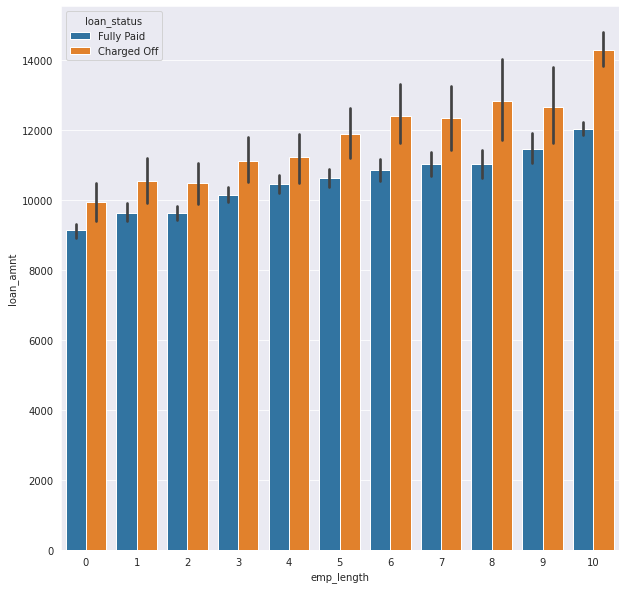

In [157]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='emp_length', y='loan_amnt', hue="loan_status")
plt.show()

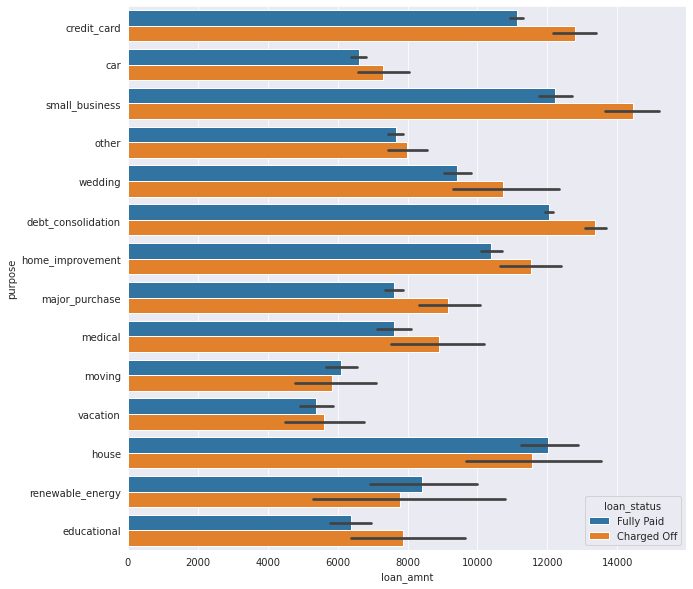

In [158]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='purpose', x='loan_amnt', hue="loan_status")
plt.show()

Analysing dti with other columns

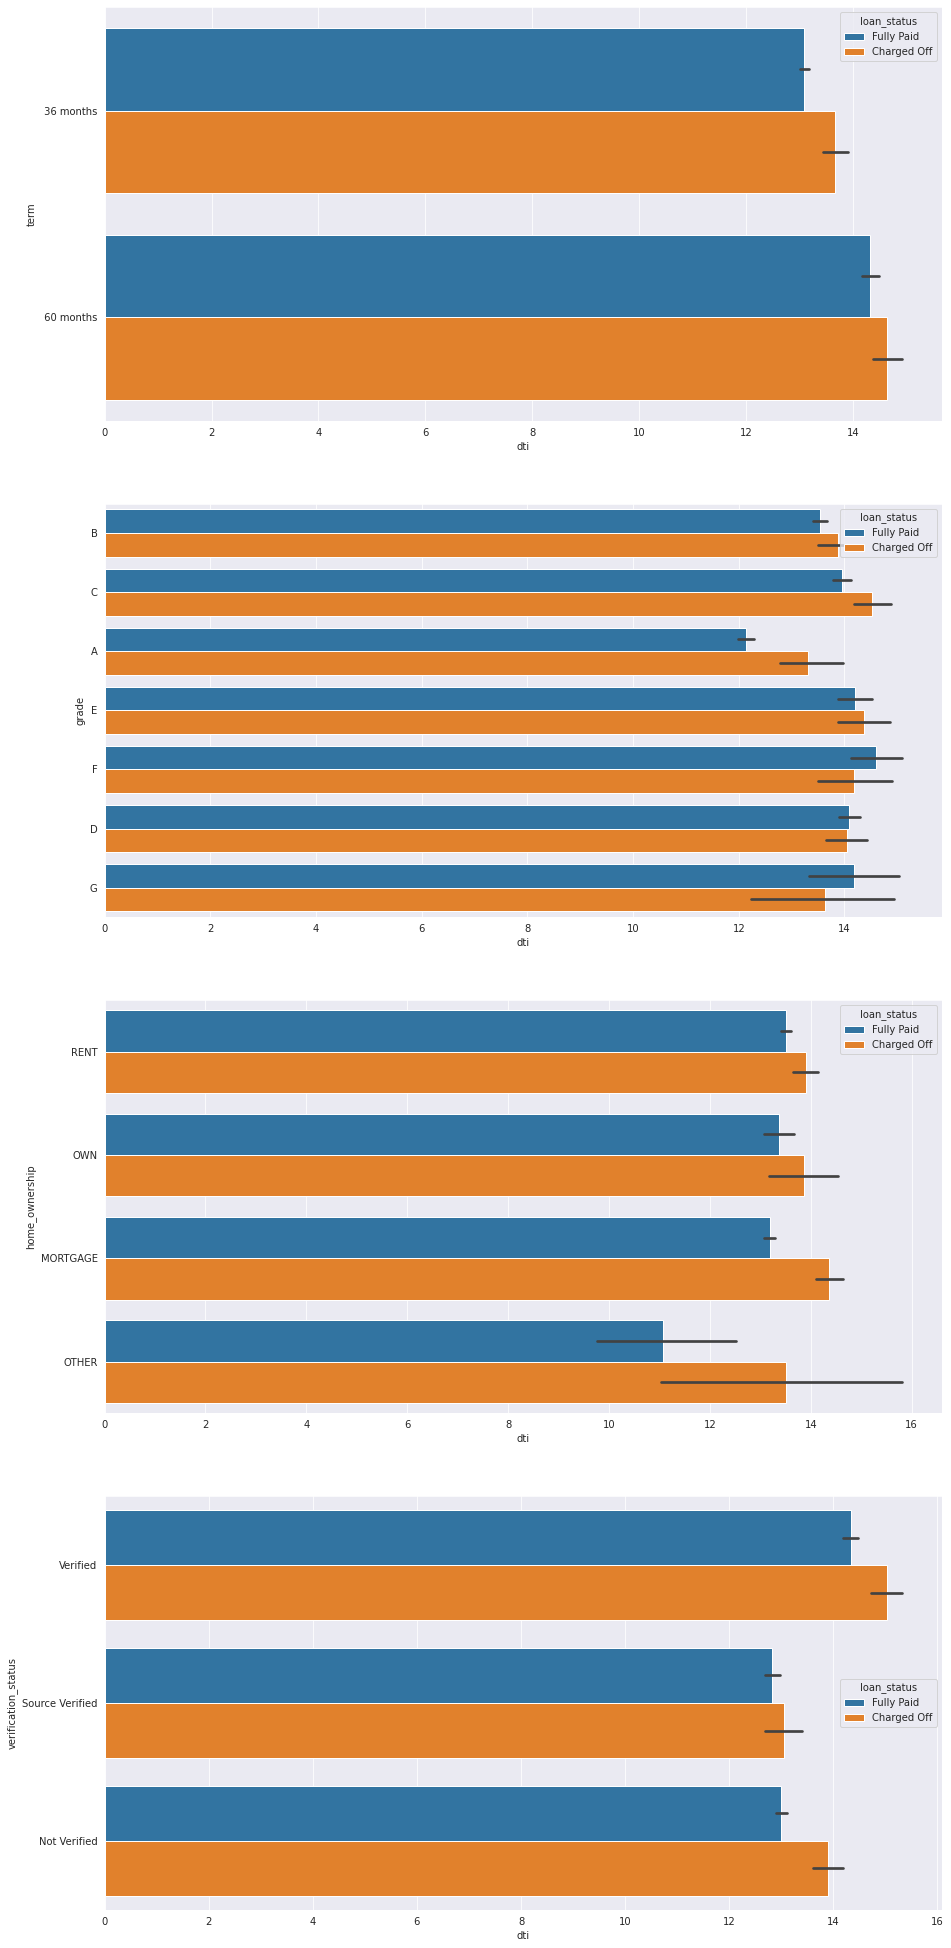

In [159]:
fig, ax = plt.subplots(4,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='dti', y='term', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='dti', y='grade', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='dti', y='home_ownership', hue="loan_status", ax=ax[2])
sns.barplot(data=df, x='dti', y='verification_status', hue="loan_status", ax=ax[3])
plt.show()

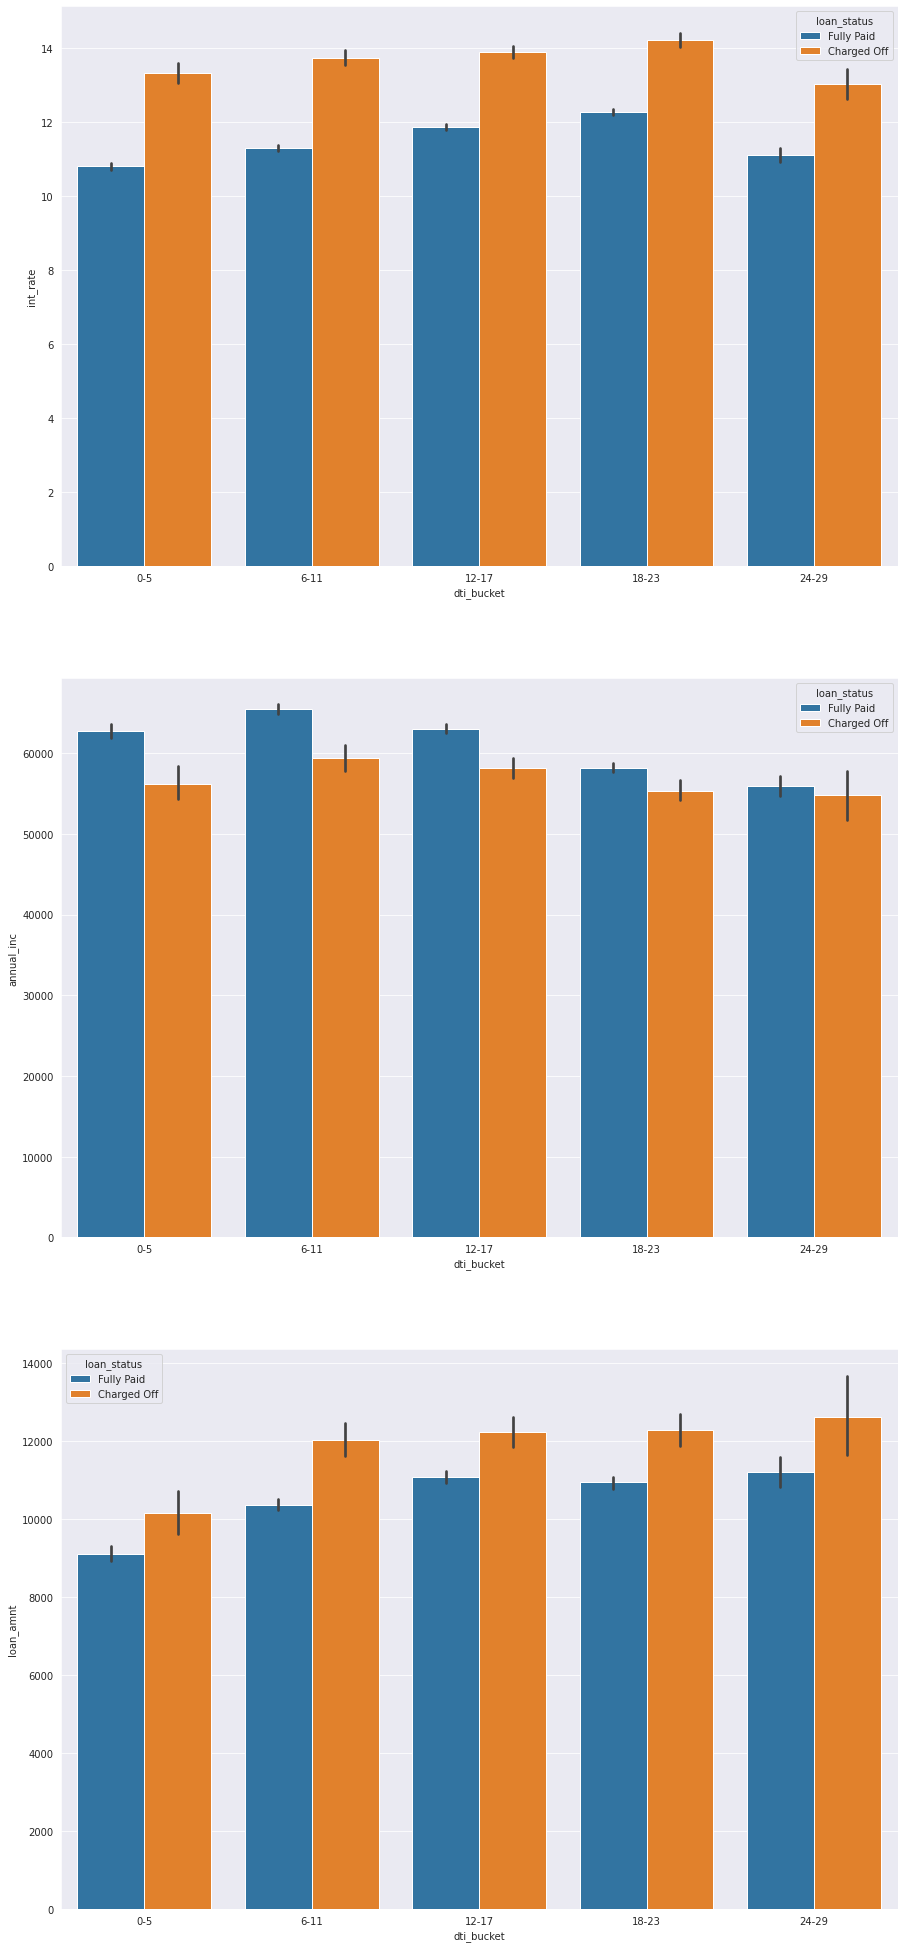

In [160]:
fig, ax = plt.subplots(3,1, figsize=(15,35))

# Multiple Graph
sns.barplot(data=df, x='dti_bucket', y='int_rate', hue="loan_status", ax=ax[0])
sns.barplot(data=df, x='dti_bucket', y='annual_inc', hue="loan_status", ax=ax[1])
sns.barplot(data=df, x='dti_bucket', y='loan_amnt', hue="loan_status", ax=ax[2])
plt.show()

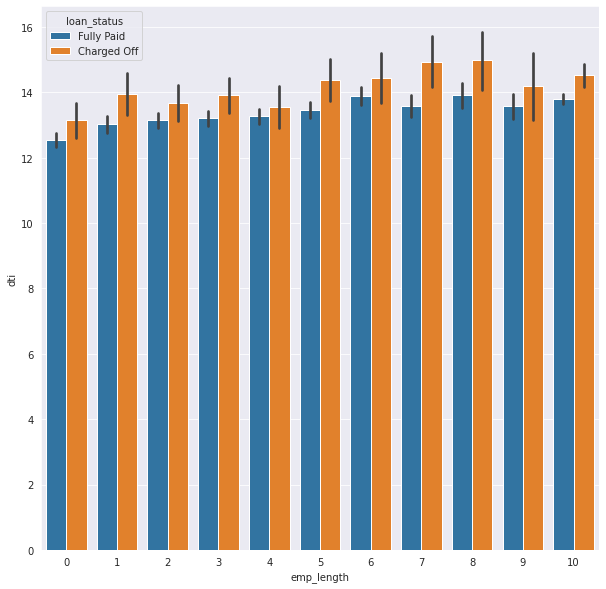

In [161]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='emp_length', y='dti', hue="loan_status")
plt.show()

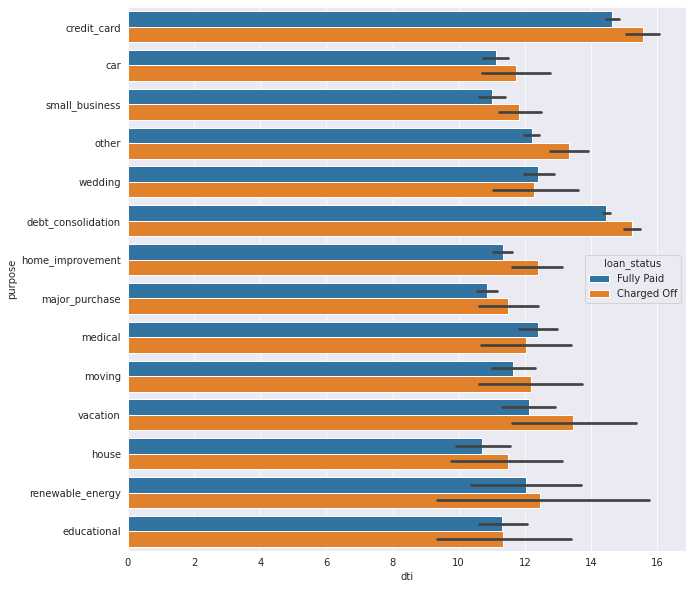

In [162]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='purpose', x='dti', hue="loan_status")
plt.show()